# **TP 3 : Méthode de Lanczos**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.sparse as spsp
import scipy.sparse.linalg as spsplin
import time


### **PARTIE 1: (Lanczos)**

**Question 1: programmation de la fonction iter_Arlnoldi**

In [2]:
#definition de la fonction iter_Arnoldi_sym

def iter_Arnoldi_sym( A, v, vold, beta):
  
    w = A @ v
    alpha = w @ v 
    w -= alpha * v + beta * vold
    beta = np.linalg.norm(w)
    vold[:] = v 
    v[:] = w/beta
    return beta , alpha
    

**Question 2: programmation de la fonction de Lanzos**

In [3]:
def Lanczos(A, nbiter):
  
  #initialisations

    n = A.shape[0]
    eigval = np.zeros((nbiter, nbiter))
    v = np.random.rand(n)
    Tdiag = []
    Tsupdiag = []
    v /= np.linalg.norm(v)
    vold = np.zeros(n)
    beta = 0
    for i in range(nbiter ):
      ##calcul des valeurs alpha et beta
      #on fait appel a la fonction iter_Arnoldi pour cela 
      beta, alpha = iter_Arnoldi_sym(A, v, vold, beta) 
        ## assemblage de Tp
      Tdiag.append(alpha)
      Tsupdiag.append(beta)
      T = np.diag(Tdiag) + np.diag(Tsupdiag[:-1],-1) + np.diag(Tsupdiag[:-1],1)
      valpro = np.linalg.eig(T)[0] ## on recupere juste les valeurs propres en mettant [0]

        #on trie les valeurs propres
      valpro.sort() 
      eigval[i,:i+1] = valpro
        
    return  eigval

**Question 3: test du programme**

test du programme

In [4]:
#on teste la programme sur une matrice A donnée
d = 10
n = d**2
A = spsp.diags([[4.]*n,[-1]*(n-1),[-1]*(n-1),[-1]*(n-d),[-1]*(n-d)], [0,1,-1,d,-d])
nbiter = 40

eigval = Lanczos(A, nbiter)

In [5]:
## on récupère les valeurs de Ritz de la matrice tridiagonale de Lanczos et on recupere la plus grande
MaxRitz = np.diag(eigval)[1:]
Max_Ritz = np.max(MaxRitz)

## on recupere les valeurs propres de A par la fonction eigsh de scipy.sparse.linalg et on recupere la plus grande
Max_eigval_eigsh = spsplin.eigsh(A, k=1, which='LM', return_eigenvectors=False)
MaxEigval_eigsh = Max_eigval_eigsh[0]

print("La plus grande valeur de Ritz de A par lanczos est : ", Max_Ritz)
print("La plus grande valeur propre de A par spsplin.eigsh est : ", MaxEigval_eigsh)

La plus grande valeur de Ritz de A par lanczos est :  7.822545692988354
La plus grande valeur propre de A par spsplin.eigsh est :  7.822545694160664


In [6]:
## On recupere la plus petite valeur de Ritz
MinRitz = eigval[:, 0]
Min_Ritz = np.min(MinRitz)

## on recupere la plus petite valeur propre de A par la fonction eigsh de scipy.sparse.linalg
Min_eigval_eigsh = spsplin.eigsh(A, k=1, which='SM', return_eigenvectors=False)
MinEigval_eigsh = Min_eigval_eigsh[0]

print("La plus petite valeur de Ritz de A par lanczos est : ", Min_Ritz)
print("La plus petite valeur propre de A par spsplin.eigsh est : ", MinEigval_eigsh)


La plus petite valeur de Ritz de A par lanczos est :  0.08390553830039053
La plus petite valeur propre de A par spsplin.eigsh est :  0.08390553830039059


Affichage la convergence des erreurs entre la plus grande valeur de RITZ  et la plus grande valeur propre.

In [7]:
## l'erreur
valpropres = np.linalg.eig(A.toarray())[0]
erreur = np.abs(MaxRitz - np.max(valpropres))

##Affichage de l'erreur
print("L'erreur est de : ", erreur[:5])
print("Erreur a le derniere iteration : ", erreur[nbiter-2])
print("Erreur a la premiere iteration : ", erreur[0])

L'erreur est de :  [2.65792205 1.37701734 0.72147906 0.46186929 0.32443232]
Erreur a le derniere iteration :  1.1723066961621953e-09
Erreur a la premiere iteration :  2.657922051441867


Tracons l'erreur a l'echelle logarithmique.

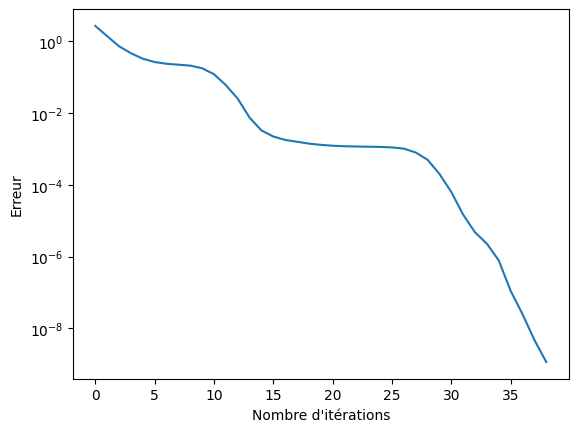

In [8]:
## Erreur entre la plus grande valeur de Ritz et la plus grande valeur propre en fonction du nombre d'itérations
plt.plot(erreur)
plt.ylabel("Erreur")
plt.xlabel("Nombre d'itérations")
plt.yscale('log')
plt.show()


Verification de convergence de la plus petite valeur propre de Ritz vers la plus petite valeur propre.

In [9]:
erreur1 = np.abs(MinRitz - np.min(valpropres))

print("Erreur 1 : ", erreur1[:5])
print("erreur a la dernier iteratiion : ", erreur1[nbiter-2])
print("erreur a la premiere iteratiion : ", erreur1[0])

Erreur 1 :  [1.08853497 0.1722184  0.06756789 0.03494559 0.01398025]
erreur a la dernier iteratiion :  9.200973316580985e-15
erreur a la premiere iteratiion :  1.0885349715087314


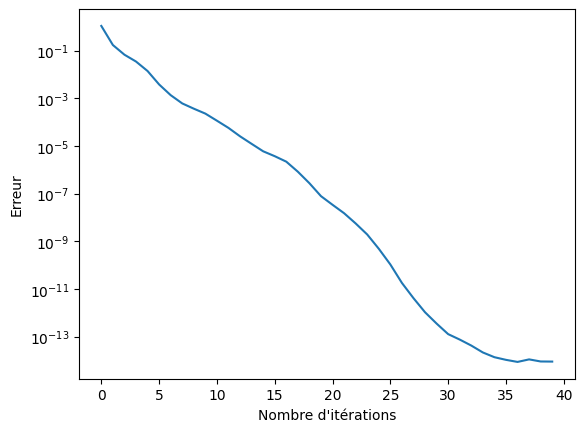

In [10]:
## Erreur entre la plus grande valeur de Ritz et la plus grande valeur propre en fonction du nombre d'itérations
plt.plot(erreur1)
plt.ylabel("Erreur")
plt.xlabel("Nombre d'itérations")
plt.yscale('log')
plt.show()

Estimation du conditionnement de la matrice A

In [11]:
print("le conditionnement de la matrice A est : ",np.linalg.cond(A.toarray()))

le conditionnement de la matrice A est :  93.23038565291247


**Question 5:**

In [12]:
##  On definit L
L = np.concatenate((np.arange(0, 2,0.01), np.arange(2, 3.1, 0.5 )))

## On definit la matrice B et on calcul son determinant et son conditionnement
B = spsp.diags( L, 0, dtype=np.float64)
det = np.linalg.det(B.toarray())
condi = np.linalg.cond(B.toarray())
#print(B)
#print(B.todense())
print("Conditionnement de B : ", condi)
print("Determinant de B : ", det)

Conditionnement de B :  inf
Determinant de B :  0.0


#### Commentaire:
Il est constaté que le déterminant de la matrice B est égal à zéro, ce qui indique que la matrice B est singulière. Lorsqu'une matrice a un déterminant nul, son conditionnement devient infini. Le conditionnement d'une matrice est une mesure de la sensibilité des solutions d'un système linéaire aux perturbations des données du système.

Un conditionnement élevé signifie que les solutions du système sont extrêmement sensibles aux perturbations importantes des coefficients de la matrice.

In [13]:
def Lanczos_printRitz(A, nbiter):
    n = A.shape[0]
    v = np.random.rand(n)
    v /= np.linalg.norm(v)
    vold = np.zeros(n)
    beta = 0
    T = np.zeros((nbiter+2, nbiter+1))
    eigenarray = np.zeros((nbiter, nbiter))
    i = 0
    for i in range(nbiter):
        beta, alpha = iter_Arnoldi_sym(A, v, vold, beta)
        T[i, i] = alpha
        T[i+1, i] = beta
        T[i, i+1] = beta
        eigval = np.linalg.eigvals(T[:i+1, :i+1])
        eigval.sort()
        eigenarray[i, :i+1] = eigval
        i += 1
        print( i, " --> ", eigval[-2:])


In [14]:
nbiter = 40
Lanczos_printRitz(B, nbiter)      

1  -->  [1.08050083]
2  -->  [0.49937585 1.6362358 ]
3  -->  [1.30933075 2.16179975]
4  -->  [1.67719195 2.83023213]
5  -->  [1.82199976 2.97495433]
6  -->  [1.95495781 2.99333634]
7  -->  [2.24148085 2.99817787]
8  -->  [2.4416309  2.99973725]
9  -->  [2.49101333 2.99997881]
10  -->  [2.49864674 2.9999984 ]
11  -->  [2.49979941 2.99999988]
12  -->  [2.49996916 2.99999999]
13  -->  [2.49999567 3.        ]
14  -->  [2.49999934 3.        ]
15  -->  [2.4999999 3.       ]
16  -->  [2.49999999 3.        ]
17  -->  [2.5 3. ]
18  -->  [2.5 3. ]
19  -->  [2.5 3. ]
20  -->  [2.5 3. ]
21  -->  [2.5 3. ]
22  -->  [2.5 3. ]
23  -->  [2.5 3. ]
24  -->  [2.5 3. ]
25  -->  [2.5 3. ]
26  -->  [2.5 3. ]
27  -->  [2.5 3. ]
28  -->  [2.5 3. ]
29  -->  [2.5 3. ]
30  -->  [2.5 3. ]
31  -->  [2.5 3. ]
32  -->  [2.5 3. ]
33  -->  [2.5 3. ]
34  -->  [2.5 3. ]
35  -->  [2.5 3. ]
36  -->  [2.85662419 3.        ]
37  -->  [2.9899933 3.       ]
38  -->  [2.99932766 3.        ]
39  -->  [2.99995779 3.        ]
40 

Commentaire:

 On remarque que ces deux valeurs propres ne sont pas ordonnées constamemnt, tantot l'une est plus grande tantot l'autre. Les deux valeurs propres les plus significatives de la matrice B sont attendues comme étant 3 et 2,5. Cependant, il est remarqué qu'après la 34ème itération, la valeur propre de 2,5 n'apparaît plus dans la liste des valeurs propres calculées. Au lieu de cela, cette valeur propre augmente progressivement jusqu'à atteindre 2,99999967, ce qui est considéré comme une valeur propre "fantôme".

### **PARTIE 2: (Methodes QR)**

**Queston 6: Programmation fonction facto_QRhessenberg**

on definit d'abord la fonction givens

In [15]:
## fonction GIVENS
def Givens(n, k, c, s):
    G = np.diag(np.ones(n))
    G[k,k] = c
    G[k, k+1] = -s
    G[k+1, k] = s
    G[k+1, k+1] = c
    return G

#on definit maintenant la fonction facto_QR_hessenberg en appellant la fonction Givens
def facto_QR_hessenberg(A):
    R = np.copy(A)
    n = A.shape[0]
    
    Q = np.diag(np.ones(n))
    for k in range(n-1):
        # on suppose c positif
        c = R[k,k]/np.sqrt(R[k,k]**2 + R[k+1,k]**2)
        s = -R[k+1,k]/np.sqrt(R[k,k]**2 + R[k+1,k]**2)
        G = Givens(n, k, c, s)
        R = G @ R
        Q = Q @ G.T
        Q = Q.T
    return Q, R


**Question 7: Testons la fonction sur une matrice aléatoire petite de taille**

In [16]:
n = 4
A = np.triu(np.random.rand(n,n),k=-1)
Q, R = facto_QR_hessenberg(A)
error = np.linalg.norm(A - Q@R)
print("A= \n", A)
print()
print("Q= \n", Q)
print()
print("R= \n", R)
print()
print("Q@R= \n", Q@R)
print()
print("||A-Q@R||= ", error)

## les valeurs sous la partie inferieure de R sont  tres nulles (ordre de 10^-18)

A= 
 [[0.47715266 0.8922793  0.64124791 0.90098108]
 [0.90065329 0.52901519 0.1272364  0.08368855]
 [0.         0.21343512 0.64499463 0.59807438]
 [0.         0.         0.62803369 0.69914016]]

Q= 
 [[ 0.46814535 -0.82195467 -0.32439244  0.        ]
 [-0.88365148 -0.4354593  -0.17185827  0.        ]
 [ 0.         -0.20198177  0.51178709  0.83503134]
 [ 0.         -0.30654377  0.77672921 -0.55020238]]

R= 
 [[ 1.01924041e+00  8.85181456e-01  4.12629865e-01  4.95741614e-01]
 [ 5.16353463e-17  5.81401543e-01  7.08450876e-01  9.23678443e-01]
 [-1.12122407e-17 -1.52711838e-17  7.52107928e-01  7.36995569e-01]
 [-1.70165973e-17 -2.31767755e-17  0.00000000e+00 -1.52172660e-01]]

Q@R= 
 [[ 4.77152659e-01 -6.34921290e-02 -6.33121875e-01 -7.66218465e-01]
 [-9.00653291e-01 -1.03536861e+00 -8.02378480e-01 -9.66945962e-01]
 [-3.03770708e-17 -1.17432514e-01  2.41824964e-01  6.35496680e-02]
 [-1.51747959e-17 -1.78225018e-01  3.67012994e-01  3.73023875e-01]]

||A-Q@R||=  3.7068954812934662


**Question 8: Programmons la fonction QR_hessenberg**

In [17]:
def QR_hessenberg(A):
  A_p = A.copy()
  max_iter = 2000
  for i in range(max_iter):
      Q, R = np.linalg.qr(A_p)
      A_p = R.dot(Q)
  eigenvalues = np.diag(A_p) 
  np.sort(eigenvalues)
  eigenvalues = eigenvalues[::-1]
  return eigenvalues

**Question 9: Testons la fonction sur une matrice aléatoire, symétrique, tridiagonale et petite de taille**

In [18]:
n = 6
A = spsp.diags([[4.]*n, [-1]*(n-1), [-1]*(n-1)], [0, 1, -1])
A = A.toarray()
print("A= \n", A)

A= 
 [[ 4. -1.  0.  0.  0.  0.]
 [-1.  4. -1.  0.  0.  0.]
 [ 0. -1.  4. -1.  0.  0.]
 [ 0.  0. -1.  4. -1.  0.]
 [ 0.  0.  0. -1.  4. -1.]
 [ 0.  0.  0.  0. -1.  4.]]


In [19]:
## Valeur propres obtenus par la méthode QR
valpro = QR_hessenberg(A)
print("Valeurs propres obtenus par la méthode QR: \n", valpro)


Valeurs propres obtenus par la méthode QR: 
 [2.19806226 2.7530204  3.55495813 4.44504187 5.2469796  5.80193774]


In [20]:
#les valeurs propres obtenues par la fonction numpy.linalg.eigvals.
val = np.linalg.eigvals(A)
val = np.sort(val)
print("les valeurs propres obtenues par la fonction numpy.linalg.eigvals sont: \n", val)

les valeurs propres obtenues par la fonction numpy.linalg.eigvals sont: 
 [2.19806226 2.7530204  3.55495813 4.44504187 5.2469796  5.80193774]


**Que se passe-t-il pour une matrice de Hessenberg
quelconque:**

In [21]:
n = 6
A_rand = np.tril(np.random.rand(n,n))
print("A_rand = \n", A_rand)

A_rand = 
 [[0.36635783 0.         0.         0.         0.         0.        ]
 [0.26782192 0.12733879 0.         0.         0.         0.        ]
 [0.38672202 0.80547234 0.65219153 0.         0.         0.        ]
 [0.57236548 0.25158125 0.91564524 0.52971484 0.         0.        ]
 [0.63097278 0.27564795 0.80877159 0.27404422 0.32250649 0.        ]
 [0.47022792 0.95866636 0.18449562 0.52522113 0.10935592 0.70187803]]


In [22]:
## valeurs propres obtenues par la méthode QR
valpro  = QR_hessenberg(A_rand)
np.sort(valpro)

array([0.12733879, 0.32250649, 0.36635783, 0.52971484, 0.65219153,
       0.70187803])

In [23]:
#les valeurs propres obtenues par la fonction numpy.linalg.eigvals.
val = np.linalg.eigvals(A_rand)
val = np.sort(val)
print("les valeurs propres obtenues par la fonction numpy.linalg.eigvals sont: \n", val)

les valeurs propres obtenues par la fonction numpy.linalg.eigvals sont: 
 [0.12733879 0.32250649 0.36635783 0.52971484 0.65219153 0.70187803]


Avec une matrice de Hessenberg, on remarque que les valeurs propres sont proches de 0

**Question 10: Remplacer la fonction np.linalg.eig par votre fonction
QR_hessenberg dand l'algo de Lanczos**

In [24]:
## on reprends la fonction Lanczos
def Lanczos1(A, nbiter):
  
  #initialisations

    n = A.shape[0]
    eigval = np.zeros((nbiter, nbiter))
    v = np.random.rand(n)
    v /= np.linalg.norm(v)
    vold = np.zeros(n)
    beta = 0
    T = np.zeros((nbiter+2, nbiter+1))
    i = 0
    for i in range(nbiter ):
      ##calcul des valeurs alpha et beta, on fait appel a la fonvtion iter_Arnoldi pour cela 
      beta, alpha = iter_Arnoldi_sym(A, v, vold, beta)
       
      ## assemblage de Tp
      T[i, i] = alpha
      T[i+1, i] = beta
      T[i, i+1] = beta
      valpro = QR_hessenberg(T[:i+1, :i+1])
      eigval[i,:i+1] = valpro
      i += 1
        
    return  eigval

In [25]:
#on teste la programme sur une matrice A donnée
d = 10
n = d**2
A = spsp.diags([[4.]*n,[-1]*(n-1),[-1]*(n-1),[-1]*(n-d),[-1]*(n-d)], [0,1,-1,d,-d])
nbiter = 40
eigval = Lanczos1(A, nbiter)


### Probleme à pour cette question!!!!!!!!!!!!!

Vérifier que le calcul des valeurs propres fonctionne encore.

In [26]:
## on récupère les valeurs de Ritz de la matrice tridiagonale de Lanczos et on recupere la plus grande
MaxRitz = np.diag(eigval)[1:]
Max_Ritz = np.max(MaxRitz)

## on recupere les valeurs propres de A par la fonction eigsh de scipy.sparse.linalg et on recupere la plus grande
Max_eigval_eigsh = spsplin.eigsh(A, k=1, which='LA', return_eigenvectors=False)
MaxEigval_eigsh = Max_eigval_eigsh[0]

print("La plus grande valeur de Ritz de A par lanczos est : ", Max_Ritz)
print("La plus grande valeur propre de A par spsplin.eigsh est : ", MaxEigval_eigsh)

La plus grande valeur de Ritz de A par lanczos est :  7.8218124954451955
La plus grande valeur propre de A par spsplin.eigsh est :  7.822545694160666


In [27]:
## On recupere la plus petite valeur de Ritz
MinRitz = eigval[:, 0]
Min_Ritz = np.min(MinRitz)

## on recupere la plus petite valeur propre de A par la fonction eigsh de scipy.sparse.linalg
Min_eigval_eigsh = spsplin.eigsh(A, k=1, which='SA', return_eigenvectors=False)
MinEigval_eigsh = Min_eigval_eigsh[0]

print("La plus petite valeur de Ritz de A par lanczos est : ", Min_Ritz)
print("La plus petite valeur propre de A par spsplin.eigsh est : ", MinEigval_eigsh)


La plus petite valeur de Ritz de A par lanczos est :  0.0839055383003905
La plus petite valeur propre de A par spsplin.eigsh est :  0.08390553830038996


Affichage la convergence des erreurs entre la plus grande valeur de RITZ  et la plus grande valeur propre.

In [28]:
## l'erreur
valpropres = np.linalg.eig(A.toarray())[0]
erreur = np.abs(MaxRitz - np.max(valpropres))

##Affichage de l'erreur
print("L'erreur est : ", erreur[:5]) ## les 5 premieres valeurs
print("Erreur a la premiere iteration : ", erreur[0])
print("Erreur a le derniere iteration : ", erreur[nbiter-2])

L'erreur est :  [2.60426056 0.85394619 0.41308416 0.22441381 0.09823847]
Erreur a la premiere iteration :  2.6042605574110853
Erreur a le derniere iteration :  0.0007331987154648445


Tracons l'erreur a l'echelle logarithmique.

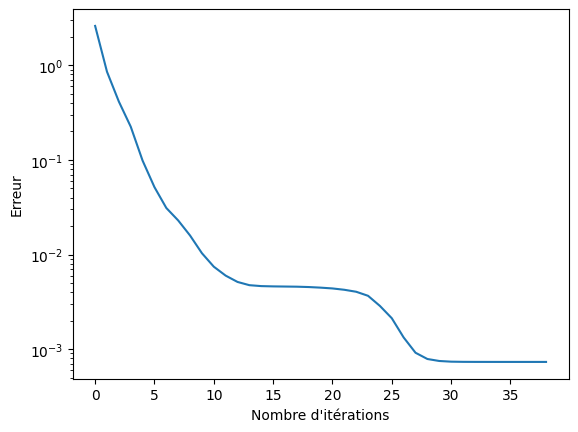

In [29]:
## Erreur entre la plus grande valeur de Ritz et la plus grande valeur propre en fonction du nombre d'itérations
plt.plot(erreur)
plt.ylabel("Erreur")
plt.xlabel("Nombre d'itérations")
plt.yscale('log')
plt.show()


Verification de convergence de la plus petite valeur propre de Ritz vers la plus petite valeur propre.

In [30]:
erreur1 = np.abs(MinRitz - np.min(valpropres))

print("Erreur 1 : ", erreur1[:5])
print("erreur a la dernier iteratiion : ", erreur1[nbiter-2])
print("erreur a la premiere iteratiion : ", erreur1[0])

Erreur 1 :  [0.91224031 0.18710083 0.06046866 0.02830421 0.01289576]
erreur a la dernier iteratiion :  8.784639682346551e-15
erreur a la premiere iteratiion :  0.9122403072647685


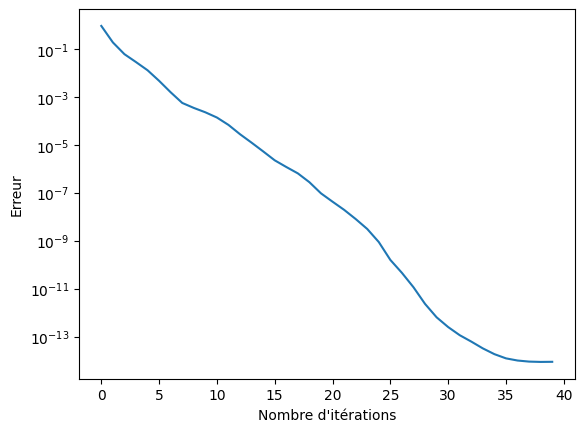

In [31]:
## Erreur entre la plus grande valeur de Ritz et la plus grande valeur propre en fonction du nombre d'itérations
plt.plot(erreur1)
plt.ylabel("Erreur")
plt.xlabel("Nombre d'itérations")
plt.yscale('log')
plt.show()

**Commentaire:**

Dans la fonction `Lanczos `, En remplacant `np.linanlg.eig` par la fonction `QR_hessenberg`, on obtient des reultats similaires



**Comparons les temps de calculs**

In [32]:
n = 25
A = spsp.diags([[4.]*n,[-1]*(n-1),[-1]*(n-1),[-1]*(n-d),[-1]*(n-d)], [0,1,-1,d,-d])
A = A.toarray() 

In [33]:
debutHSBRG = time.time()
QR_hessenberg(A)
finHSBRG = time.time()
tmpHSBRG = finHSBRG - debutHSBRG

debutNP = time.time()
np.linalg.eigvals(A)
finNP = time.time()
tmpNP = finNP - debutNP


print("Temps d'execution de la methode de Hessenberg : ", tmpHSBRG)
print("\n Temps d'execution de la methode de numpy : ", tmpNP)





Temps d'execution de la methode de Hessenberg :  0.4962947368621826

 Temps d'execution de la methode de numpy :  0.00042700767517089844


On voit clairement que la fonction `np.linalg.eigvals` de `numpy` est plus rapide que notre fonction `QR_hessenberg` .

****